<a href="https://colab.research.google.com/github/ShikhaMaurya212402/Contact-Book-Project/blob/main/AICTEProject_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [00:29<00:00, 97.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import glob as gb
import cv2

In [3]:
train = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [4]:
size = 224
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    train,
    target_size=(size, size),
    batch_size=164,
    class_mode='categorical',
    color_mode='rgb',
    subset='training',
    shuffle=True
)

Found 63282 images belonging to 38 classes.


In [5]:
train_generator

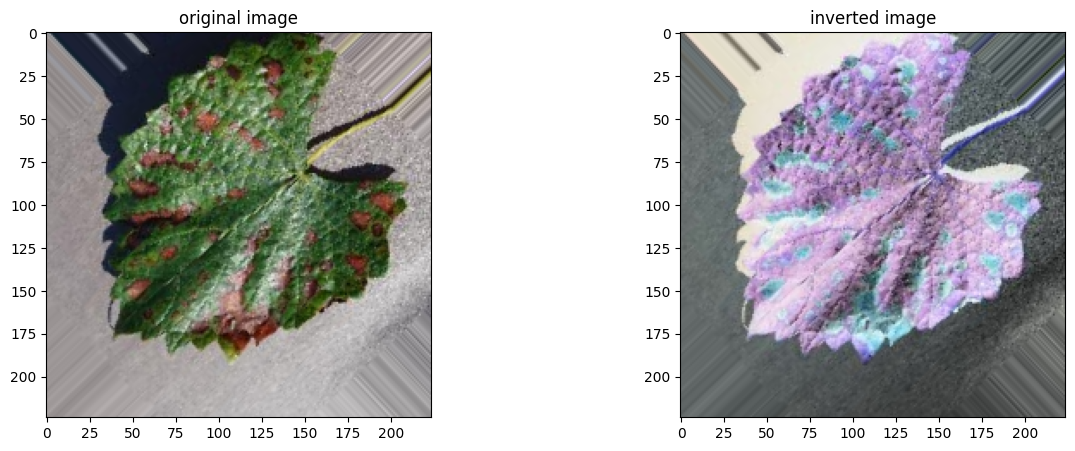

In [6]:
image, label  = train_generator[0]
fig,(ax1,ax2) = plt.subplots(figsize=(15,5),nrows=1,ncols=2)
ax1.imshow(image[0].transpose(1,0,2))
ax1.set_title("original image")
ax2.imshow(1-image[0].transpose(1,0,2))
ax2.set_title("inverted image")
plt.show()

In [7]:
for x, y in train_generator:
  print(x, x.shape)
  print(y, y.shape)
  break

[[[[6.65063322e-01 6.49377048e-01 6.53298616e-01]
   [6.87232375e-01 6.71546102e-01 6.75467670e-01]
   [7.39977241e-01 7.24290967e-01 7.28212535e-01]
   ...
   [6.08312666e-01 5.69096982e-01 5.73018551e-01]
   [6.40544653e-01 6.01328969e-01 6.05250537e-01]
   [5.81388593e-01 5.42172909e-01 5.46094477e-01]]

  [[6.82569087e-01 6.66882753e-01 6.70804322e-01]
   [6.63864374e-01 6.48178101e-01 6.52099669e-01]
   [6.91172004e-01 6.75485730e-01 6.79407299e-01]
   ...
   [6.42600119e-01 6.03384435e-01 6.07306004e-01]
   [5.77106416e-01 5.37890732e-01 5.41812301e-01]
   [5.73211491e-01 5.33995748e-01 5.37917316e-01]]

  [[6.85255051e-01 6.69568777e-01 6.73490345e-01]
   [6.82397723e-01 6.66711450e-01 6.70633018e-01]
   [6.62665308e-01 6.46979034e-01 6.50900602e-01]
   ...
   [5.72824180e-01 5.33608496e-01 5.37530065e-01]
   [5.76637208e-01 5.37421525e-01 5.41343093e-01]
   [6.22846663e-01 5.83630979e-01 5.87552547e-01]]

  ...

  [[5.38279116e-01 4.95141834e-01 5.10828137e-01]
   [4.90362704e-

In [8]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

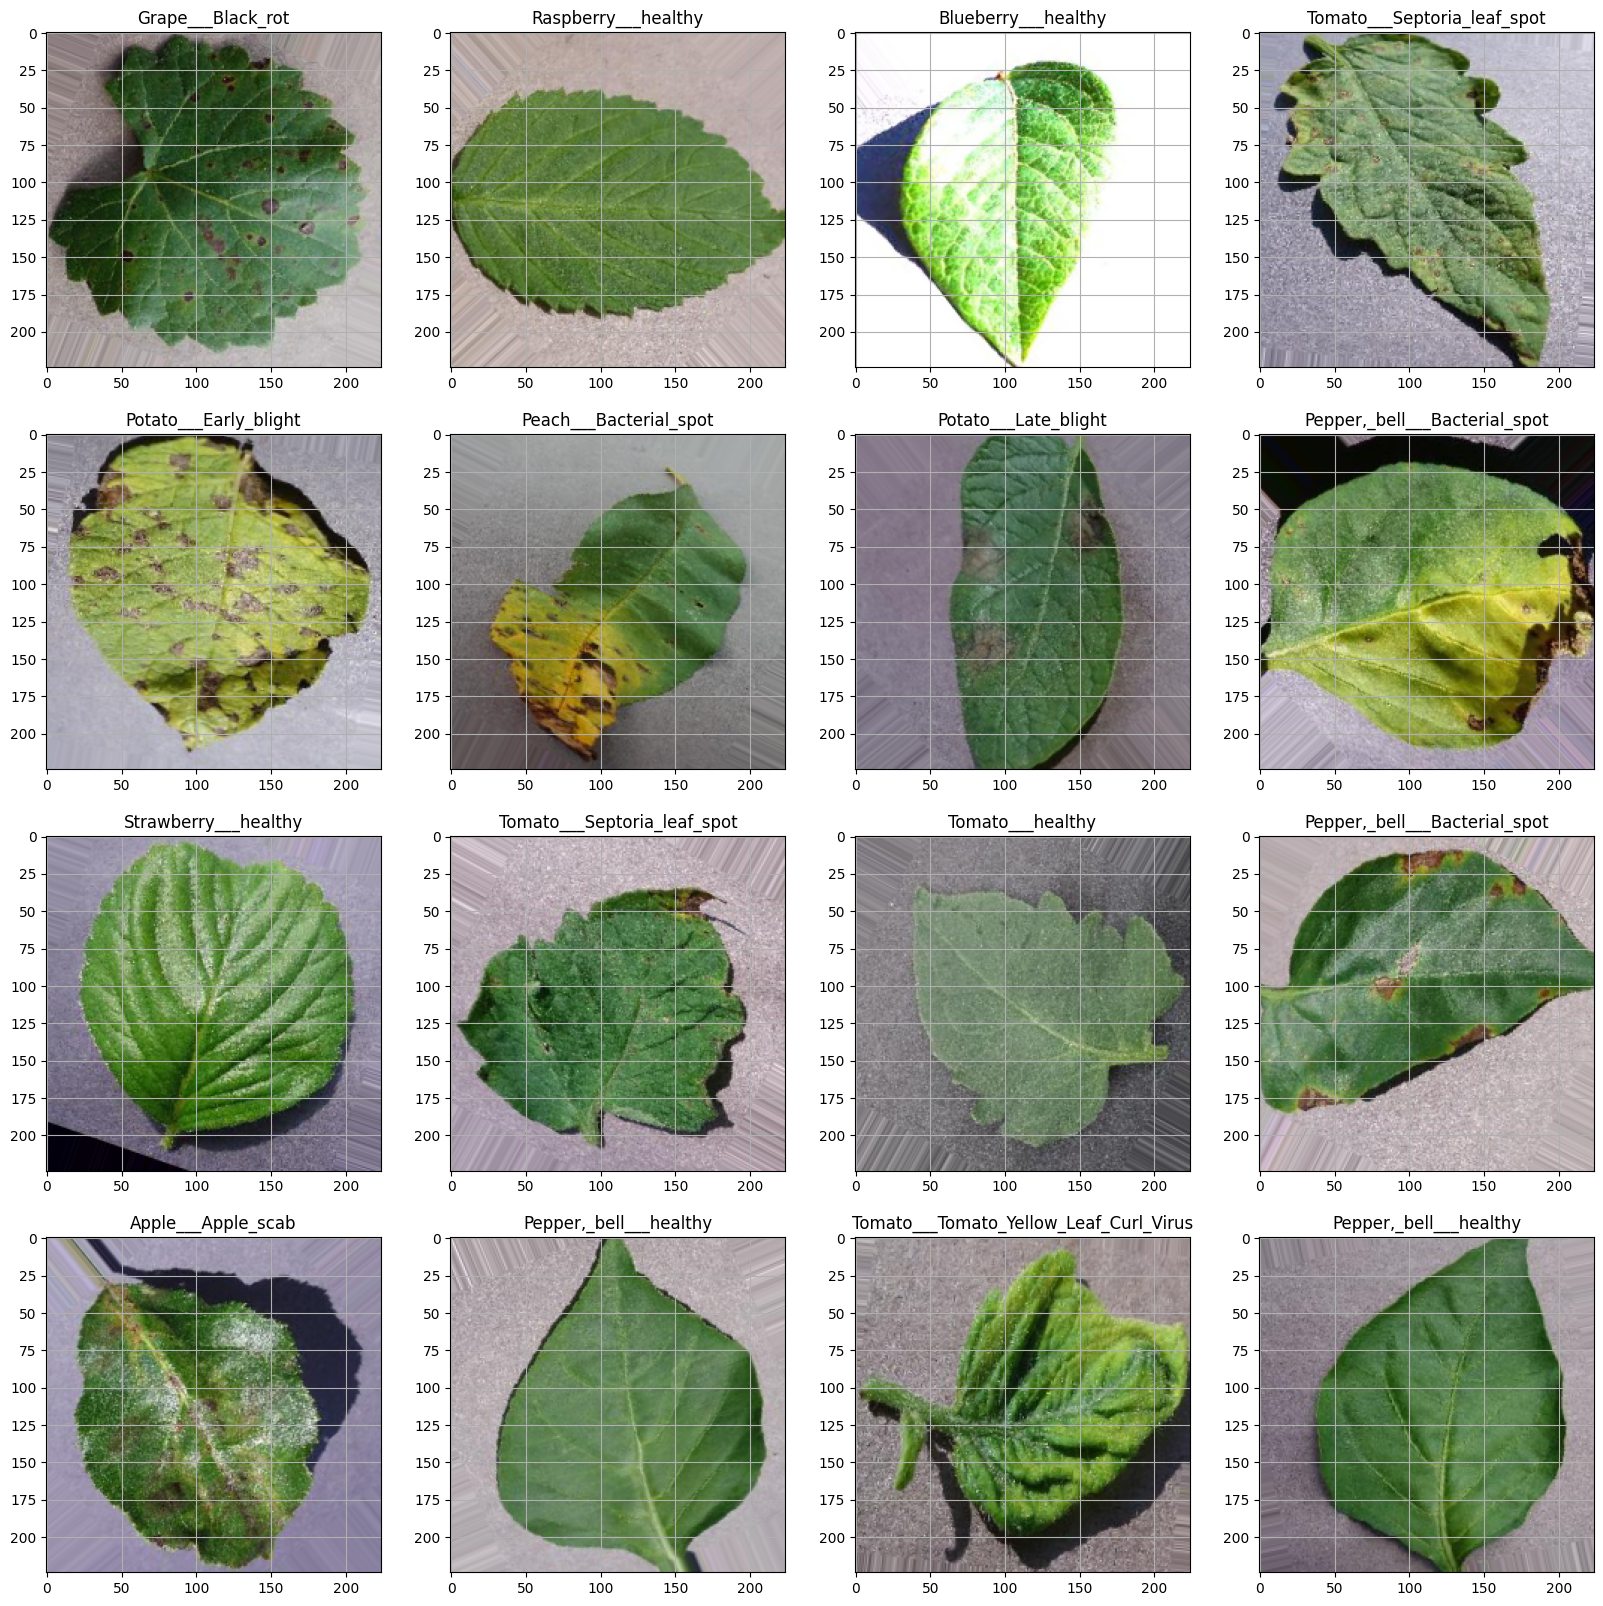

In [9]:
classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
  for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_batch[i])
    plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    plt.grid(None)
  plt.show()
  break

In [10]:
valid = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [11]:
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function = None,
    validation_split=0.1
).flow_from_directory(valid,
                      batch_size=164,
                      target_size=(size, size),
                      class_mode='categorical',
                      color_mode='rgb',
                      subset='validation',
                      shuffle=False)

Found 1742 images belonging to 38 classes.


In [12]:
test = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function = None
).flow_from_directory(test,
                      batch_size=164,
                      target_size=(224, 224),
                      color_mode='rgb',
                      class_mode = 'categorical',
                      shuffle = False)


Found 17572 images belonging to 38 classes.


In [13]:
test_generator.class_indices


{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

Building Model

In [44]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Dropout
from keras.models import Sequential


In [60]:
model = Sequential()


In [ ]:
#to avoid overshooting
# choose small learning rate default 0.001 we are taking 0.0001
# there may be a chance of underfiiting so increase the number of neuron

In [62]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[224, 224, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [63]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [64]:
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [65]:
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [66]:
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [67]:
model.add(Dropout(0.25))

In [68]:
model.add(tf.keras.layers.Flatten())

In [69]:
model.add(Dense(units=1500, activation='relu'))

In [70]:
model.add(Dropout(0.4))

In [71]:
#output layer
model.add(Dense(units=38, activation='softmax'))

In [72]:
#compliling model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 222, 222, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 111, 111, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 54, 54, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 26, 26, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 10, 10, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 5, 5, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1500)                │         769,500 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,557,258 (21.20 MB)

 Trainable params: 5,557,258 (21.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#model training
training_history = model.fit(x=train_generator, validation_data=valid_generator, epochs=10)

Epoch 1/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0762 - loss: 3.3546

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


386/386 ━━━━━━━━━━━━━━━━━━━━ 935s 2s/step - accuracy: 0.0763 - loss: 3.3539 - val_accuracy: 0.2778 - val_loss: 2.4447
Epoch 2/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 799s 2s/step - accuracy: 0.3168 - loss: 2.2718 - val_accuracy: 0.3984 - val_loss: 2.0154
Epoch 3/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 799s 2s/step - accuracy: 0.4904 - loss: 1.6545 - val_accuracy: 0.6068 - val_loss: 1.2336
Epoch 4/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 808s 2s/step - accuracy: 0.5993 - loss: 1.2858 - val_accuracy: 0.6613 - val_loss: 1.0779
Epoch 5/10
217/386 ━━━━━━━━━━━━━━━━━━━━ 5:45 2s/step - accuracy: 0.6623 - loss: 1.0822